# Environment Preparing

In [68]:
from my_config import * 
from PIL import Image
import os
import torchvision.utils as vutils
import random

# Data Augmentation

In [69]:
base_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # 先进行resize 
    transforms.ToTensor()
])

In [70]:
noop_transform = transforms.Lambda(lambda x: x)

augmentation_transforms = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    # transforms.ColorJitter(brightness=0.7, contrast=0.7),
    # transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random'),
    # transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # 模糊处理
    noop_transform
]

# Data Loading

In [ ]:
img_dir = '../dataset/CelebA/img_align_celeba/img_align_celeba'
attr_dir = '../dataset/CelebA/list_attr_celeba.txt'
attrs_df = pd.read_csv(attr_dir, delim_whitespace=True, skiprows=1, header=0)

In [95]:
attrs_df

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,-1,...,-1,1,-1,1,1,-1,1,-1,-1,1


In [102]:
class CelebADataset(Dataset):
    def __init__(self,img_dir,attr_df,base_transforms,augmentation_transforms=None):
        self.img_dir = img_dir
        self.base_transforms = base_transforms
        self.augmentation_transforms = augmentation_transforms
        self.attr_df = attr_df
       
    
    def __len__(self):
        return len(self.attr_df)            
    
    def __getitem__(self, idx):
        
        label = [self.attr_df['Young'].iloc[idx] , self.attr_df['Pale_Skin'].iloc[idx] , self.attr_df['Male'].iloc[idx] ]
        img_path = os.path.join(self.img_dir, self.attr_df.index[idx])
        image = Image.open(img_path)
        

        image = self.base_transforms(image)
        
        if self.augmentation_transforms:
            augmentation = random.choice(self.augmentation_transforms)
            image = augmentation(image)
        
        # if not isinstance(image,torch.Tensor):
        #     image = transforms.ToTensor()(image)    
        
        
        return image, torch.tensor(label, dtype=torch.float)
        

In [103]:
celeba_dataset = CelebADataset(img_dir,attrs_df,base_transforms=base_transforms,augmentation_transforms=augmentation_transforms)

In [104]:
test_loader = DataLoader(celeba_dataset, batch_size=16, shuffle=True)

In [105]:
attrs_df['Pale_Skin'][0] 

C:\Users\eliasjiang\AppData\Local\Temp\ipykernel_22172\1200536652.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrs_df['Pale_Skin'][0]


-1

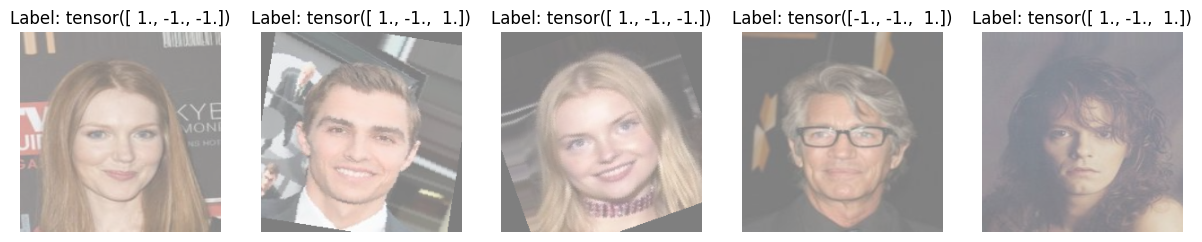

In [110]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(image, title=None):
    """Helper function to show an image."""
    image = image / 2 + 0.5  # 反归一化
    plt.imshow(np.transpose(image, (1, 2, 0)))  # 转换为 HWC 格式
    if title is not None:
        plt.title(title)
    plt.axis('off')

# 从数据加载器中获取一些样本
dataiter = iter(test_loader)  # 选择你的数据加载器
images, labels = next(dataiter)  # 获取一批图像和标签

# 设置图像数量
num_images = 5
plt.figure(figsize=(15, 5))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    imshow(images[i].numpy(), title=f'Label: {labels[i]}')  # 显示图像和标签

plt.show()

In [9]:
# dataset_size = len(celeba_dataset)
# train_size = int(0.8 * dataset_size)  # 80% 作为训练集
# val_size = int(0.1 * dataset_size)    # 10% 作为验证集
# test_size = dataset_size - train_size - val_size  # 剩下 10% 作为测试集

In [10]:
# train_dataset, val_dataset, test_dataset = random_split(celeba_dataset, [train_size, val_size, test_size])

In [11]:
# train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
# test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)